## Amplitude Modulation

In [1]:
# first thing first - import the packages we need
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

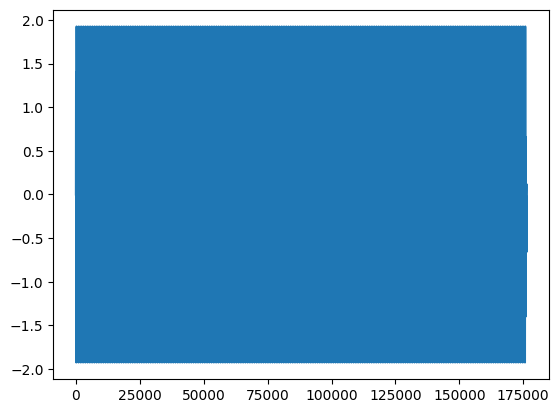

In [2]:
# Amplitude Modulation with Sinusoidal Carrier, Modulator

fs = 44100 # sample rate
T = 1/fs   # sampling period T

duration = 4
t = np.arange(0, duration, T ) # time line: equi-spaced line

# carrier frequency
f_carrier = 200

# modulator frequency
f_mod = 50

# modulation index
mod_index = 1

carrier = np.sin( 2*np.pi*f_carrier*t )  
mod = np.sin( 2*np.pi*f_mod*t )  

s = carrier * ( 1 + mod_index * mod )

plt.plot(s)

ipd.Audio(s,rate=fs)

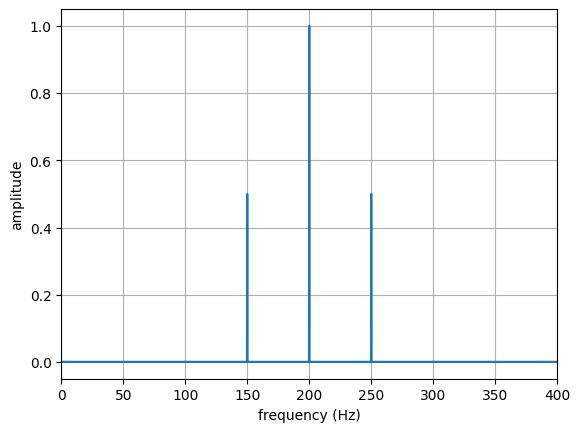

In [3]:
# plot the spectrum
N = len(s)
S = fft(s)
f = np.fft.fftfreq(N,d=1/fs)
plt.plot(f, abs(S)*2/N)
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,400)
plt.grid()

### Reflected side bands
What happens when the difference between carrier and modulator frequencies is exceeds the distance from zero?
One side band trespass to the negative frequencies, and is “reflected back”.
In this example, fc = 100 Hz, fm = 150 Hz. The reflected side band is at 50 Hz.


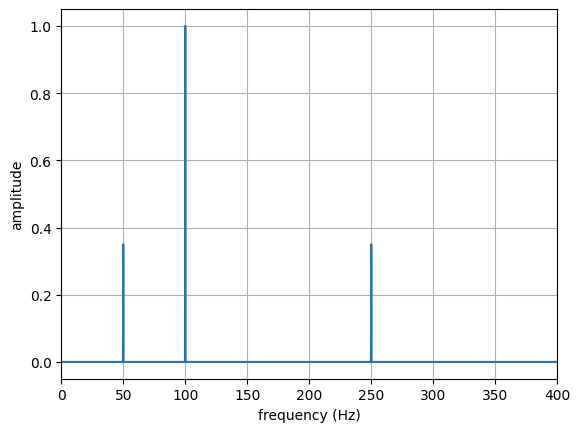

In [4]:
fs = 44100 # sample rate
T = 1/fs   # sampling period T

duration = 10
t = np.arange(0, 4.0, T ) # time line: equi-spaced line

# carrier frequency
f_carrier = 100

# modulator frequency
f_mod = 150

# modulation index
mod_index = 0.7

carrier = np.sin( 2*np.pi*f_carrier*t )  
mod = np.sin( 2*np.pi*f_mod*t )  

s = carrier * ( 1 + mod_index * mod )

# plot the spectrum
N = len(s)
S = fft(s)
f = np.linspace(0,fs,N)
start=0
end=2000
plt.plot(f, abs(S)*2/N)
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,400)
plt.grid()

ipd.Audio(s,rate=fs)

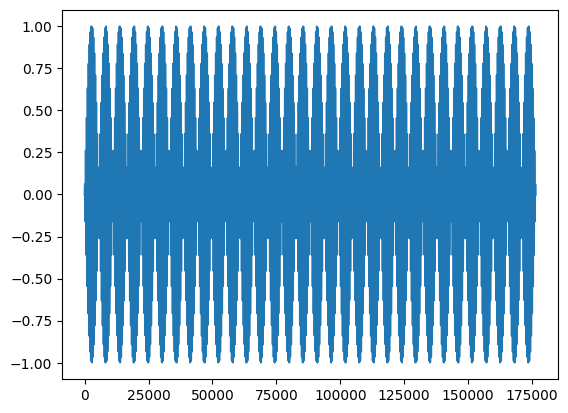

In [5]:
# Amplitude Modulation with Suppressed Carrier

fs = 44100 # sample rate
T = 1/fs   # sampling period T

duration = 10
t = np.arange(0, 4.0, T ) # time line: equi-spaced line

# carrier frequency
f_carrier = 120

# modulator frequency
f_mod = 4  

carrier = np.sin( 2*np.pi*f_carrier*t )  
mod = np.sin( 2*np.pi*f_mod*t )  

s = carrier * mod 

plt.plot(s)

ipd.Audio(s,rate=fs)

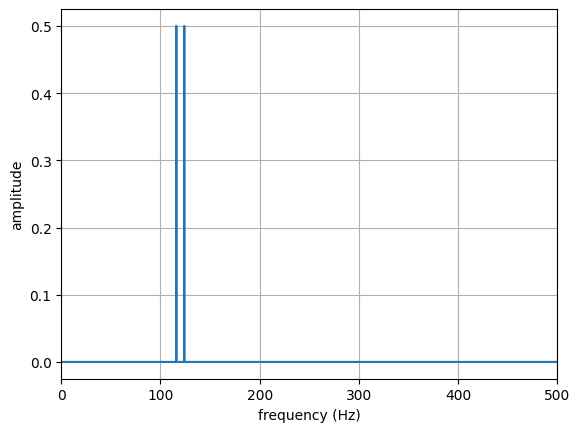

In [8]:
# plot the spectrum
from numpy.fft import fft

N = len(s)
S = fft(s)
f = np.linspace(0,fs,N)
plt.plot(f, abs(S)*2/N)
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,500)
plt.grid()

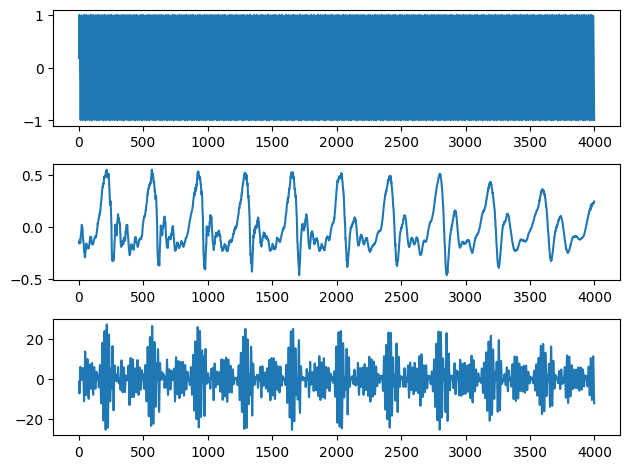

In [9]:
# Amplitude Modulation with an audio signal
import soundfile as sf

mod,fs = sf.read('../wavs/speech-male.wav')
#mod = mod[:,0] # convert to mono if needed

# modulation index
mod_index = 50

T = 1/fs   # sampling period T
t = np.arange(0, np.size(mod))*T

# carrier frequency
f_carrier = 2500

carrier = np.sin( 2*np.pi*f_carrier*t )  

s = carrier * ( mod_index * mod )

fig,ax=plt.subplots(3)
n=16000
m=20000
ax[0].plot(carrier[n:m])
ax[1].plot(mod[n:m])
ax[2].plot(s[n:m])
plt.tight_layout()

ipd.Audio(s,rate=fs)

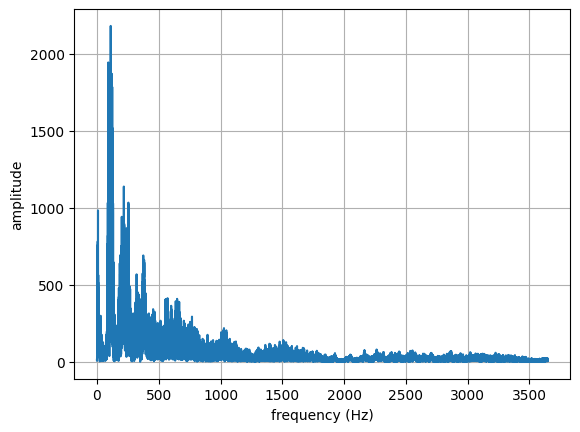

In [32]:
# plot the spectrum of the original modulator signal
from numpy.fft import fft

N = len(mod)
S = fft(mod)
f = np.linspace(0,fs,N)
start=0
end=20550
plt.plot(f[start:end], abs(S[start:end]))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.grid()

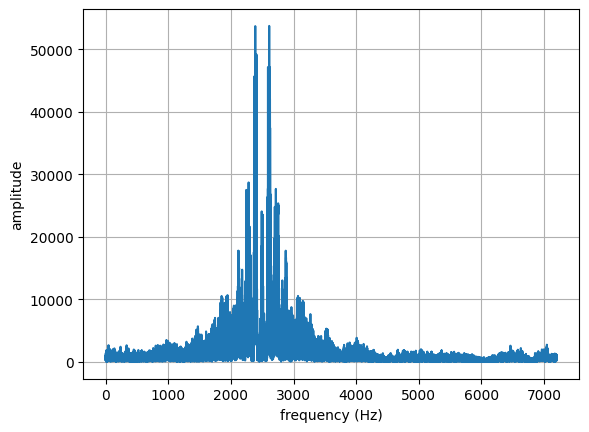

In [36]:
# plot the spectrum
from numpy.fft import fft

N = len(s)
S = fft(s)
f = np.linspace(0,fs,N)
start=0
end=40550
plt.plot(f[start:end], abs(S[start:end]))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.grid()